In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2

# Chi-square test for categorical vs target
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency #scientific python
import math
from sklearn.model_selection import train_test_split


In [ ]:
#Reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("gender_submission.csv")


In [ ]:
train_copy = train.copy()

In [ ]:
train.shape


(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


[Text(0, 0, '549'), Text(0, 0, '342')]

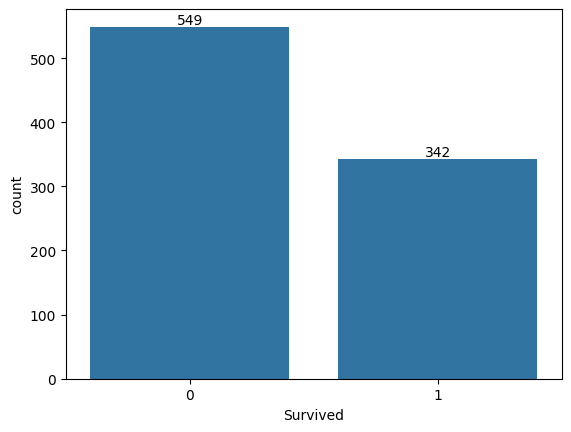

In [ ]:
ax = sns.countplot(x = 'Survived', data = train)
ax.bar_label(ax.containers[0])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='Age'>

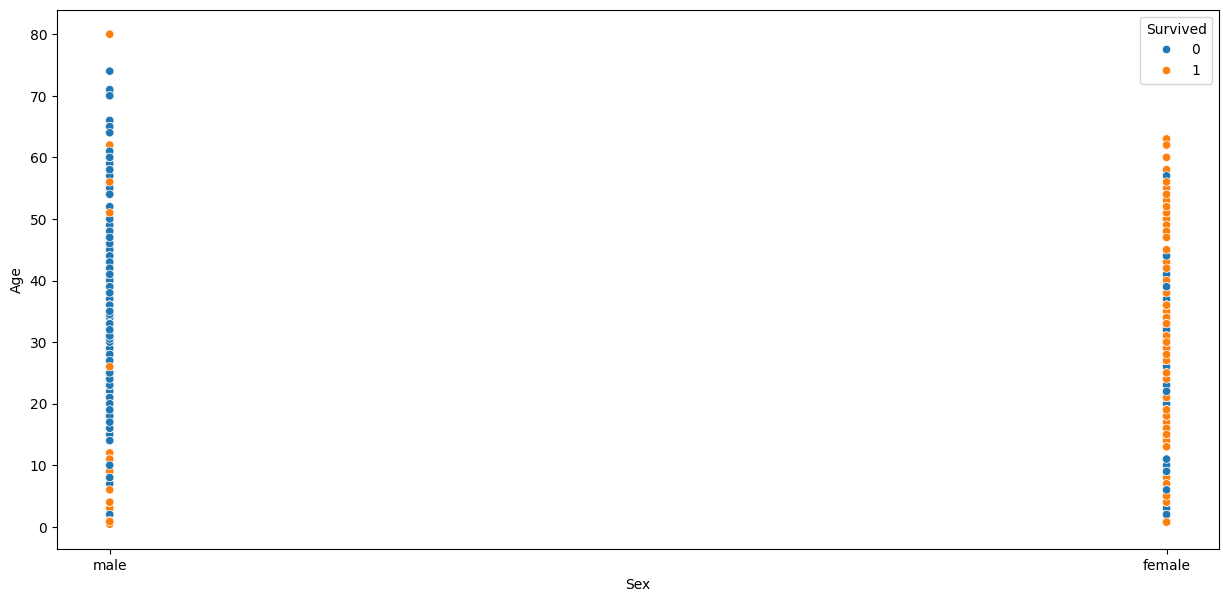

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'Sex', y = 'Age', data = train, hue = 'Survived')

<Axes: xlabel='Parch', ylabel='SibSp'>

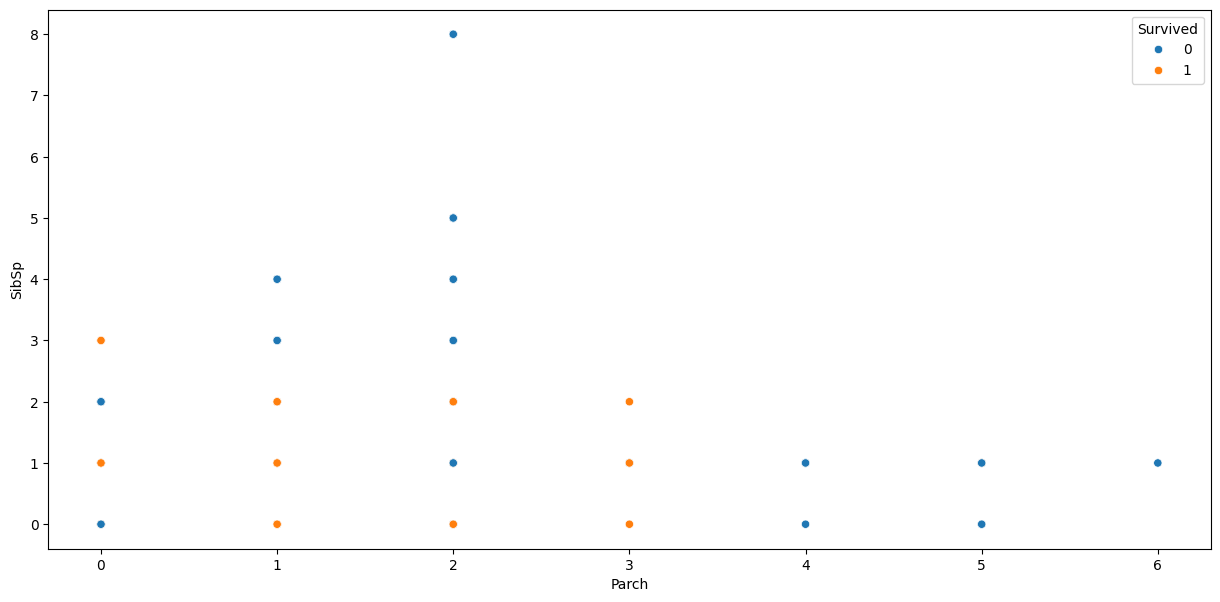

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'Parch', y = 'SibSp', data = train, hue = 'Survived')



<Axes: xlabel='Sex', ylabel='Age'>

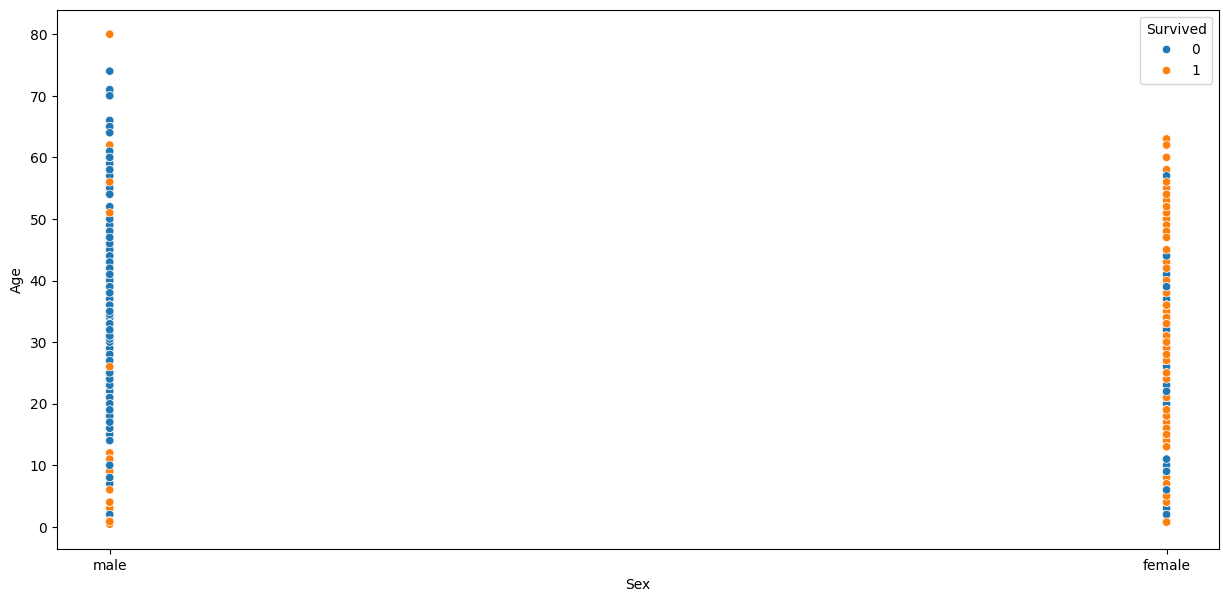

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'Sex', y = 'Age', data = train, hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='Sex'>

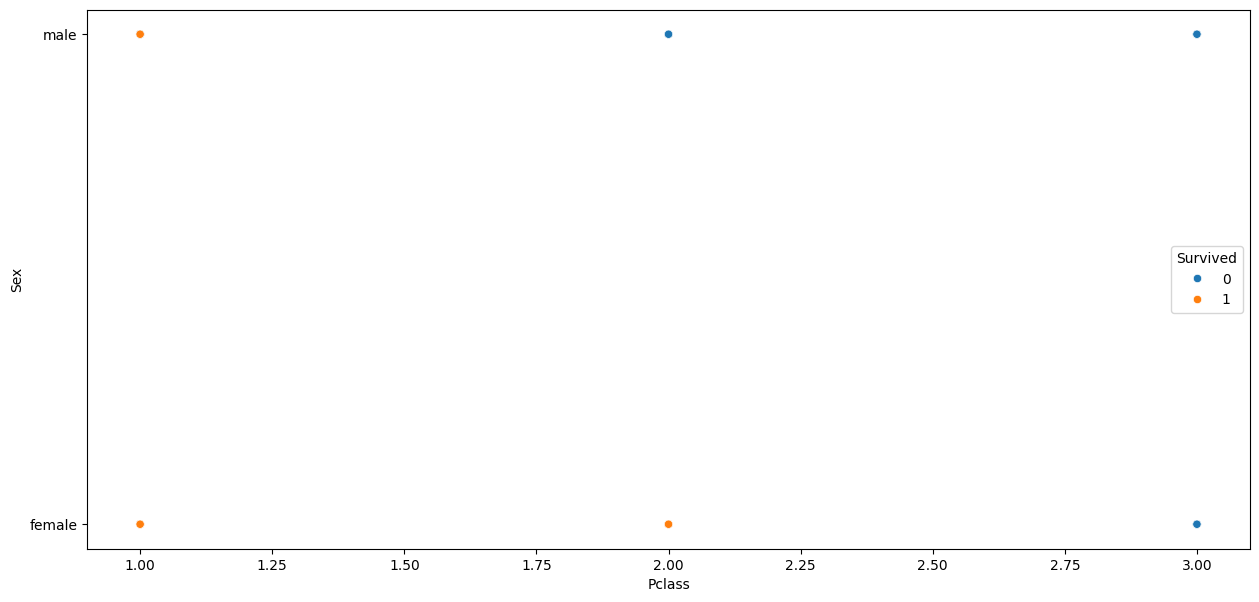

In [ ]:

plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'Pclass', y = 'Sex', data = train, hue = 'Survived')


In [ ]:
for col in train.columns:
  print(col, train[col].isna().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#python to take the frstletter in the columnvalue ina series
# train["Cabin_Short"] = train["Cabin"].apply(lambda x: str(x)[0] if x.isna() == False else x)
# train["Cabin_Short"] = train["Cabin_Short"].fillna(train['Cabin_Short'].mode()[0], inplace=True)

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#train['Survived'].replace({'Y':1, 'N':0}, inplace = True)
# train['Age'].fillna(train['Age'].median(), inplace=True)
# train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)

<Axes: >

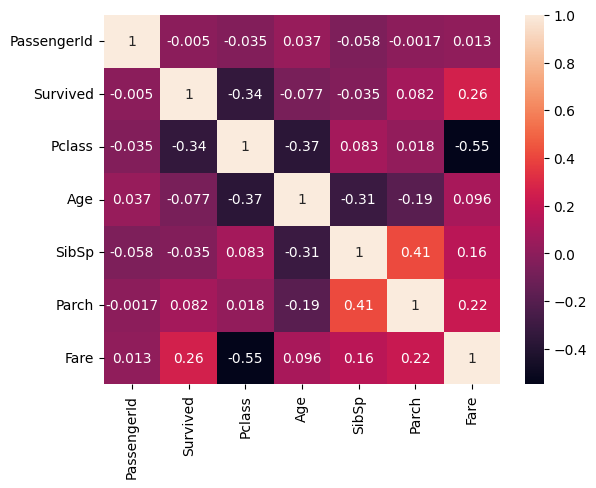

In [ ]:
sns.heatmap(train.select_dtypes(np.number).corr(), annot = True)

In [ ]:
cat_cols = train.select_dtypes(exclude=np.number).columns
chi_results = []

#Chi-Square is a test for variance
for c in cat_cols:
    contingency = pd.crosstab(train[c], train["Survived"])
    chi2_stat, p, dof, ex = chi2_contingency(contingency)
    chi_results.append((c, chi2_stat, p))
    #H0 - No association between each categorical variable and binned sales
    #HA - Strong Relationship (p<0.05) reject Null
chi_df = pd.DataFrame(chi_results, columns=["Feature","Chi2","p_value"]).sort_values("p_value")
print("Chi-Square association with Survival (lower p = stronger association):")
display(chi_df)

Chi-Square association with Survival (lower p = stronger association):


,Feature,Chi2,p_value
1,Sex,260.717020,1.197357e-58
4,Embarked,26.489150,1.769922e-06
2,Ticket,766.569703,1.152730e-02
3,Cabin,161.250000,1.835735e-01
0,Name,891.000000,4.842482e-01


In [ ]:
y = train['Survived']

In [ ]:
X = train.drop(columns = ['PassengerId', 'Name', 'Survived'])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = .2, random_state = 42)

In [ ]:
#'Embarked', 'Ticket' 'Sex_num', "Embarked_num", "Cabin_num"
#categorical_features = ['Sex', "Ticket", "Embarked", "Cabin"]
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare' ]

In [ ]:
# class GenderNumConvertor():
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         print(f"X from GenderNumConvertor ---" + X);
#         X = pd.DataFrame(X)
#         mapping = {'Male': 1, 'Female': 2}
#         X= X.map(mapping)
#         return X
# class manipulateCabin():
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         print(f"X from manipulateCabin ---" + X);
#         X = pd.DataFrame(X)
#         X["Cabin"] = X["Cabin"].apply(lambda x: str(x)[0] if x.isna() == False else x)
#         return X
# def GenderNumConvertor(df):
#     df['Sex'] = {'Male': 1, 'Female': 2}
#     X= X.map(mapping)
def manipulateCabin(df_cabin_col):
    #transformed_series = df_cabin_col['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'U')
    transformed_series = df_cabin_col['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else x)
    return pd.DataFrame(transformed_series, columns=['Cabin'])

# def ticketDetails(df_ticket_col):
#   ticket_prefix_series = df_ticket_col['Ticket'].str.extract(r'([A-Za-z\.\/]+)', expand=False).fillna('NONE')
#   return pd.DataFrame(ticket_prefix_series, columns=['Ticket'])

def ticketDetails(df_ticket_col):

  ticket_prefix_series = df_ticket_col['Ticket'].str.extract(r'([A-Za-z\.\/]+)', expand=False).fillna('NONE')
  ticket_numeric_alpha_series = df_ticket_col['Ticket'].str.extract(r'(\d+[A-Za-z]*)', expand=False).fillna('NONE')
  return pd.DataFrame({'Ticket_Prefix': ticket_prefix_series, 'Ticket_NumericAlpha': ticket_numeric_alpha_series})



In [ ]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Imputing all categorical columns to mode

# Define a pipeline for simple categorical features (Sex, Embarked)
sex_embarked_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Define a pipeline for 'Cabin'
cabin_pipeline = Pipeline(
    steps=[
        ('format_cabin', FunctionTransformer(manipulateCabin, validate=False, feature_names_out="one-to-one")),
        ('imputer', SimpleImputer(strategy='most_frequent')), # Impute 'U' if it appears as NaN or other issue
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Define a pipeline for 'Ticket'
ticket_pipeline = Pipeline(
    steps=[
        ('format_ticket', FunctionTransformer(
            ticketDetails,
            validate=False,
            # Update feature_names_out to reflect the two new columns returned by ticketDetails
            feature_names_out=lambda _, names: ['Ticket_Prefix', 'Ticket_NumericAlpha']
        )),
        ('imputer', SimpleImputer(strategy='most_frequent')), # Imputes missing values for both new columns
        ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encodes both new columns
    ]
)

# The previously defined pipelines (impute_categorical, allCatCols_transformer, etc.) are no longer directly used in preprocess, but kept for context if needed elsewhere.
# They will be replaced by the more specific pipelines above.

In [ ]:
numerical_transformer =  Pipeline(
    steps = [
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
    ]
)


# categorical_transformer = Pipeline(
#     steps = [
#     ('imputer',SimpleImputer(strategy='most_frequent')),
#     ('onehot',OneHotEncoder())
#     ]
# )



In [ ]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num_transform", numerical_transformer, numerical_features),
        ("sex_embarked_preprocess", sex_embarked_pipeline, ['Sex', 'Embarked']),
        ('cabin_preprocess', cabin_pipeline, ['Cabin']),
        ('ticket_preprocess', ticket_pipeline, ['Ticket'])
    ],
    remainder='drop' # Drop any other columns not explicitly handled
)

In [ ]:
preprocess

ColumnTransformer(transformers=[('num_transform',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('sex_embarked_preprocess',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked']),
                                ('c...
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Cabin']),
                                ('ticket_preprocess',
                                 Pipeline(steps=[('format_ticket',
                                                  FunctionTransformer(feature_names_out=<function <lambda> at 0x7e40e3f5b740>,
                                                                      func=<function ticketDetails at 0x7e40e6c57b00>)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Ticket'])])

In [ ]:
X_train_transformed = preprocess.fit_transform(train_X)
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_df.isna().sum()

,0
0,0


In [ ]:
X_train_transformed_df.head(10)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
5,<Compressed Sparse Row sparse matrix of dtype ...
6,<Compressed Sparse Row sparse matrix of dtype ...
7,<Compressed Sparse Row sparse matrix of dtype ...
8,<Compressed Sparse Row sparse matrix of dtype ...
9,<Compressed Sparse Row sparse matrix of dtype ...


In [ ]:
# ColumnTransformer(transformers=[('num_transform',
#                                  Pipeline(steps=[('imputer',
#                                                   SimpleImputer(strategy='median')),
#                                                  ('scale', StandardScaler())]),
#                                  ['Age']),
#                                 ('cat_transform',
#                                  Pipeline(steps=[('imputer',
#                                                   SimpleImputer(strategy='most_frequent')),
#                                                  ('onehot', OneHotEncoder())]),
#                                  ['Embarked', 'Ticket'])])

In [ ]:
model_preprocess = Pipeline(

         steps = [


                  ('Preprocess', preprocess),
                  ('Model', LogisticRegression())
         ]
)

In [ ]:
model_preprocess.fit(train_X, train_y)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('sex_embarked_preprocess',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignor...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cabin']),
                                                 ('ticket_preprocess',
                                                  Pipeline(steps=[('format_ticket',
                                                                   FunctionTransformer(feature_names_out=<function <lambda> at 0x7e40e3f5b740>,
                                                                                       func=<function ticketDetails at 0x7e40e6c57b00>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ticket'])])),
                ('Model', LogisticRegression())])

In [ ]:
train_pred = model_preprocess.predict(train_X)

In [ ]:
test_pred = model_preprocess.predict(test_X)

In [ ]:
print(accuracy_score(train_y, train_pred))
print(accuracy_score(test_y, test_pred))

0.8778089887640449
0.8324022346368715


In [ ]:
print(classification_report(train_y, train_pred))
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       444
           1       0.89      0.77      0.83       268

    accuracy                           0.88       712
   macro avg       0.88      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
print(confusion_matrix(train_y, train_pred))
print('-------------------------------')
print(confusion_matrix(test_y, test_pred))

[[419  25]
 [ 62 206]]
-------------------------------
[[92 13]
 [17 57]]


In [ ]:
test_data = test.drop(columns = ['PassengerId'])

In [ ]:
test_pred = model_preprocess.predict(test_data)

In [ ]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission['Survived'] = test_pred

In [ ]:
submission.to_csv('submission_TitanicLogistRegression_WithTickerNumber.csv', index = False)